In [25]:
# Анализ оригинальных фильмов Netflix

## Описание датасета
## Этот датасет содержит информацию о всех оригинальных фильмах Netflix, выпущенных на 1 июня 2021 года. Данные были получены с Wikipedia и дополнены рейтингами IMDB.

### **Столбцы в датасете:**
## - **Title** – название фильма
## - **Genre** – жанр фильма
## - **Premiere** – дата премьеры
## - **Runtime** – продолжительность (в минутах)
## - **IMDB Score** – рейтинг IMDB
## - **Languages** – доступные языки

## Мы проанализируем этот датасет, исследуем распределение рейтингов, жанры, а также корреляцию различных признаков.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Загрузка данных
df = pd.read_csv('NetflixOriginals.csv', encoding='latin1')

# Преобразование даты премьеры в формат datetime
df['Premiere'] = pd.to_datetime(df['Premiere'])
df['Year'] = df['Premiere'].dt.year

# Вывод первых 5 строк
df.head()


,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020


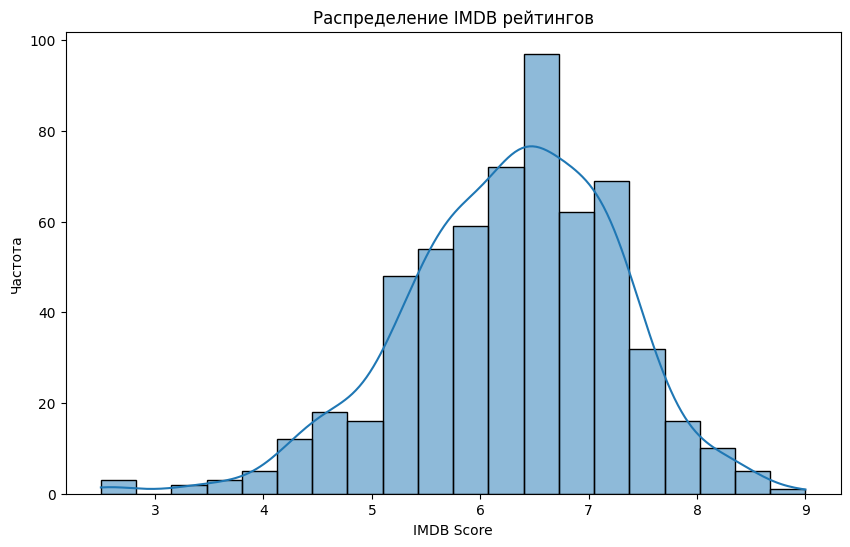

In [28]:
# Гистограмма IMDB рейтингов
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB Score'], bins=20, kde=True)
plt.title('Распределение IMDB рейтингов')
plt.xlabel('IMDB Score')
plt.ylabel('Частота')
plt.show()


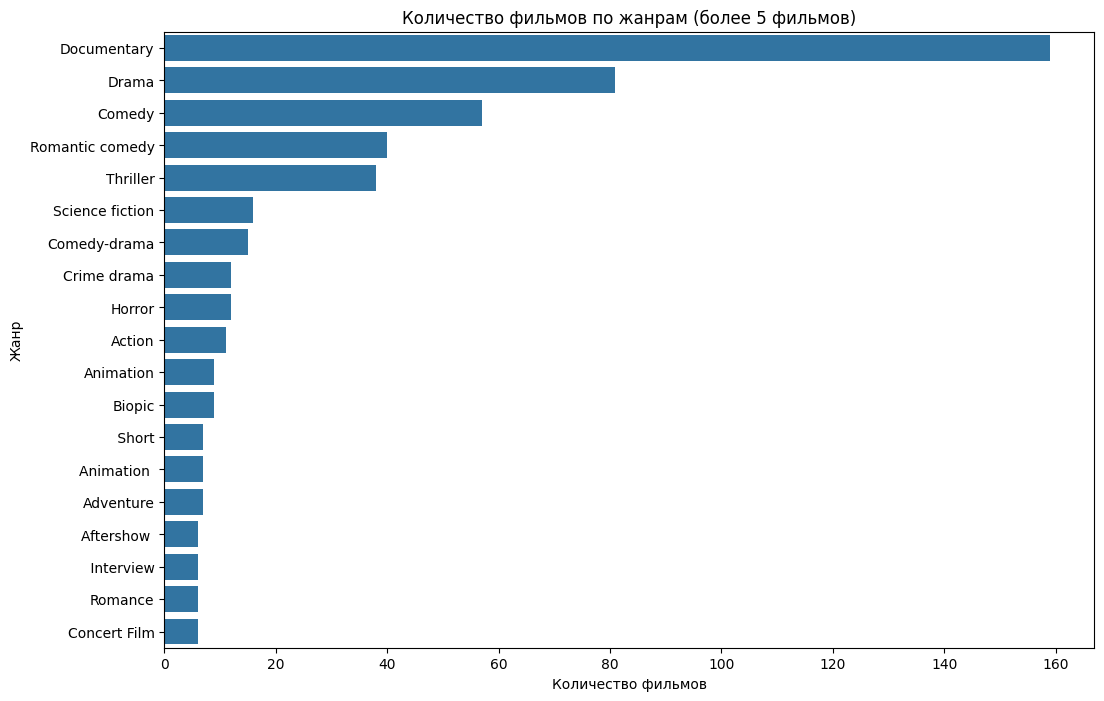

In [29]:
# Анализ жанров
# Разделение жанров и создание словаря
genre_dict = {}
for index, row in df.iterrows():
    genres = row['Genre'].split('/')
    for genre in genres:
        if genre in genre_dict:
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1

# Преобразуем словарь в DataFrame
genre_df = pd.DataFrame(list(genre_dict.items()), columns=['Genre', 'Count'])

# Вывод первых 10 жанров
genre_df.head(10)

# Оставляем только жанры с более чем 5 фильмами
filtered_genre_df = genre_df[genre_df['Count'] > 5]

# Визуализация
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=filtered_genre_df.sort_values(by='Count', ascending=False))
plt.title('Количество фильмов по жанрам (более 5 фильмов)')
plt.xlabel('Количество фильмов')
plt.ylabel('Жанр')
plt.show()


Корреляционная матрица:
            IMDB Score   Runtime      Year     Genre
IMDB Score    1.000000 -0.040896 -0.141347 -0.180935
Runtime      -0.040896  1.000000  0.069262  0.201278
Year         -0.141347  0.069262  1.000000  0.018715
Genre        -0.180935  0.201278  0.018715  1.000000


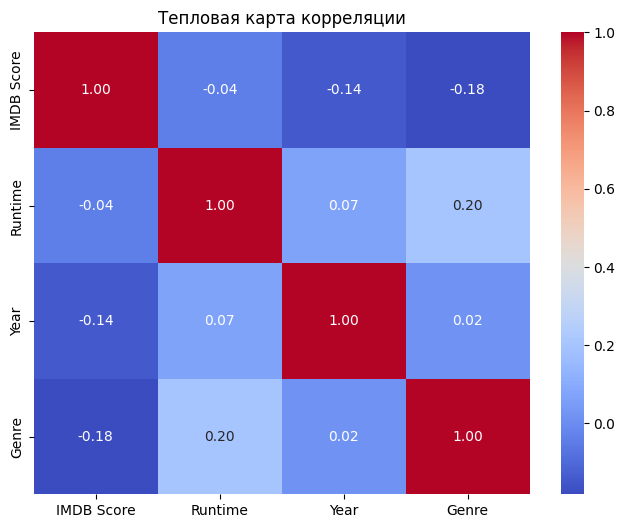

In [30]:
# Корелляция
# Выбираем только числовые признаки для корреляции
numeric_df = df[['IMDB Score', 'Runtime', 'Year']]

# Кодируем жанр в числовой формат (например, category codes)
df['Genre'] = df['Genre'].astype('category').cat.codes
numeric_df = numeric_df.copy()
numeric_df['Genre'] = df['Genre']

# Выводим корреляционную матрицу
correlation_matrix = numeric_df.corr()
print("Корреляционная матрица:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции')
plt.show()
